In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('eda.csv')
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min salary', 'max salary',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'same_state', 'python', 'rstudio', 'spark', 'aws', 'excel',
       'job_simp', 'senority', 'desc_len', 'no_of_Competitors'],
      dtype='object')

In [21]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','no_of_Competitors','hourly','employer_provided_salary',
             'job_state','same_state','age','python','spark','aws','excel','job_simp','senority','desc_len']]

In [22]:
df_dum=pd.get_dummies(df_model)
df_dum.columns

Index(['avg_salary', 'Rating', 'no_of_Competitors', 'hourly',
       'employer_provided_salary', 'same_state', 'age', 'python', 'spark',
       'aws',
       ...
       'job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
       'senority_jr', 'senority_na', 'senority_sr'],
      dtype='object', length=177)

In [23]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.335
Date:                Tue, 21 May 2024   Prob (F-statistic):             0.0126
Time:                        22:03:44   Log-Likelihood:                -3322.8
No. Observations:                 672   AIC:                             6930.
Df Residuals:                     530   BIC:                             7570.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                73.6876      8.935      8.247      0.000      56.135      91.241
Rating                                               -3.7574      1.728     -2.175      0.030      -7.152      -0.363
no_of_Competitors                                     0.2713      1.712      0.158      0.874      -3.093       3.635
hourly                                               17.1294     23.499      0.729      0.466     -29.034      63.292
employer_provided_salary                           1.319e-10   1.84e-10      0.719      0.473   -2.29e-10    4.93e-10
same_state                                           -6.7938      4.377     -1.552      0.121     -15.392       1.804
age                                                  -0.0796      0.070     -1.137      0.256      -0.217       0.058
python                                               -0.6265      4.457     -0.141      0.888      -9.383       8.130
spark                                                 1.0924      4.421      0.247      0.805      -7.592       9.777
aws                                                  -5.2271      4.451     -1.174      0.241     -13.970       3.516
excel                                                -0.1439      3.687     -0.039      0.969      -7.386       7.099
desc_len                                              0.0020      0.001      1.525      0.128      -0.001       0.005
Size_-1                                               3.5010      4.121      0.850      0.396      -4.595      11.597
Size_1 to 50 employees                                7.6327      6.541      1.167      0.244      -5.217      20.483
Size_10000+ employees                                -0.1543      8.653     -0.018      0.986     -17.153      16.844
Size_1001 to 5000 employees                           2.8412      5.559      0.511      0.609      -8.078      13.761
Size_201 to 500 employees                            17.4292      6.155      2.832      0.005       5.338      29.520
Size_5001 to 10000 employees                          0.5895      7.986      0.074      0.941     -15.099      16.277
Size_501 to 1000 employees                            9.5477      5.952      1.604      0.109      -2.145      21.240
Size_51 to 200 employees                             17.0303      5.245      3.247      0.001       6.728      27.333
Size_Unknown                                         15.2704     10.684      1.429      0.153      -5.717      36.258
Type of ownership_-1                                  3.5010      4.121      0.850      0.396      -4.595      11.597
Type of ownership_College / University               -2.7748      8.493     -0.327      0.744     -19.459      13.909
Type of ownersh

In [25]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-7485182.5655681705

,alpha,error
62,0.63,-28.873271


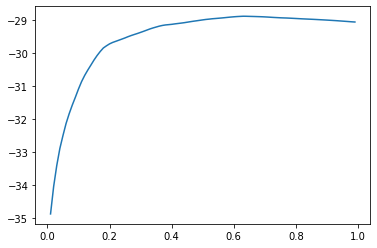

In [26]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [45]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('absolute_error', 'poisson'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


D:\Download D\c drive\python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Download D\c drive\python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Download D\c drive\python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R